In [1]:
!nvidia-smi

Thu May 20 13:54:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.95.01    Driver Version: 440.95.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:05:00.0 Off |                  N/A |
| 23%   30C    P8     8W / 250W |     42MiB / 11175MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:06:00.0 Off |                  N/A |
| 23%   27C    P8     8W / 250W |      2MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [4]:
!pip install pandas

     |████████████████████████████████| 9.5 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 28.6 MB/s eta 0:00:01


In [8]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
#import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import keras.backend as K
import glob
from PIL import Image
from sklearn.model_selection import train_test_split 
#from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from sklearn.metrics import confusion_matrix
#from keras.callbacks import EarlyStopping
#from keras.preprocessing import image
import tensorflow as tf
import cv2

import re
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000 
from skimage import io
#import labelme
from Img_pro_defs import *
PIXEL = 1080 * 1616
from scipy import ndimage, misc
#import keras_segmentation
import imgaug as ia
#import imgaug.augmenters as iaa
from imgaug import augmenters as iaa
import shutil

In [65]:
orig_list = glob.glob('/home/sami/Semester 6/Narrow leaf/Canola Sami/wheat with mulitlabel/salt/*.png')
orig_list = sorted_nicely(orig_list)

#anot_list = glob.glob('/home/sami/Semester 4/Mohana/dataset/trainY/*.png')
#anot_list = sorted_nicely(anot_list)

#orig_train, orig_test, anot_train, anot_test = train_test_split(orig_list,anot_list,test_size = 0.1)
x_train = np.asarray(orig_list)
#y_train = np.asarray(anot_train)
#x_test = np.asarray(orig_test)
#y_test = np.asarray(anot_test)


Y_train = np.array([tf.keras.preprocessing.image.img_to_array(image.load_img(fname),dtype="uint8") for fname in x_train])#target_size = (512,800)


In [67]:
np.unique(Y_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255],
      dtype=uint8)

In [57]:
(thresh, p) = cv2.threshold(y[0,:,:,2],(np.max(y[0,:,:,2])+np.min(y[0,:,:,2]))/2, 1, cv2.THRESH_BINARY)

In [68]:
y =np.zeros_like(Y_train)

In [49]:
y[:,:,:,2] =  Y_train[:,:,:,1]

In [43]:
len(Y_train)

22

In [69]:
for i in range(len(Y_train)):
    p =Y_train[i,:,:,1]
    (thresh, p) = cv2.threshold(p,(np.max(p)+np.min(p))/2, 1, cv2.THRESH_BINARY)
    y[i,:,:,2] = p*255.0
    cv2.imwrite(x_train[i],y[i,:,:,:])

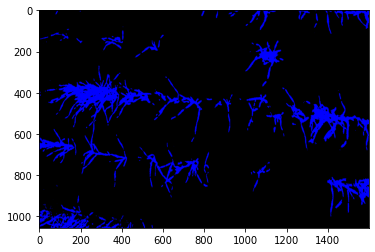

In [63]:
plt.imshow(y[i])

In [11]:
Y_train.shape

(59, 4016, 6016, 3)

In [6]:
Y_train = Y_train/128

In [18]:
Y_train[:,:,:,0].max()

1.0

In [19]:
import cv2

outpath ="/home/sami/Semester 4/Hamza/Beans/binary"

for filename in range(0,len(orig_list)):
    # load and resize the image
    
    save_fname = os.path.join(outpath, os.path.splitext(os.path.basename(orig_list[filename]))[0]+'.png')
    cv2.imwrite(save_fname, Y_train[filename,:,:,0]) 
    # convert to numpy array
print('Image sepration Done')


Image sepration Done


In [17]:
save_fname = os.path.join(outpath, os.path.splitext(os.path.basename(orig_list[0]))[0]+'.png')
print(save_fname)

/home/sami/Semester 4/Hamza/Beans/binary/2020-06-12_16-11-45-674-0600.png


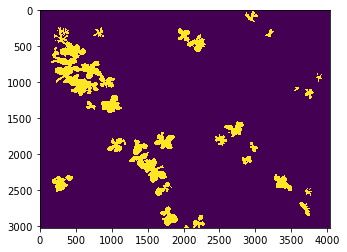

In [9]:
from matplotlib import pyplot as plt
plt.imshow(Y_train[0,:,:,0])

In [3]:
Y_train.shape

(12, 3024, 4032, 3)

In [13]:
orig_list

['/home/sami/Semester 4/Hamza/Beans/Labelf/2020-06-12_16-11-45-674-0600.png',
 '/home/sami/Semester 4/Hamza/Beans/Labelf/2020-06-12_16-12-05-334-0600.png',
 '/home/sami/Semester 4/Hamza/Beans/Labelf/2020-06-12_16-14-04-891-0600.png',
 '/home/sami/Semester 4/Hamza/Beans/Labelf/2020-06-12_16-14-08-237-0600.png',
 '/home/sami/Semester 4/Hamza/Beans/Labelf/2020-06-12_16-14-11-207-0600.png',
 '/home/sami/Semester 4/Hamza/Beans/Labelf/2020-06-12_16-14-13-901-0600.png',
 '/home/sami/Semester 4/Hamza/Beans/Labelf/2020-06-12_16-14-16-433-0600.png',
 '/home/sami/Semester 4/Hamza/Beans/Labelf/2020-06-12_16-19-46-962-0600.png',
 '/home/sami/Semester 4/Hamza/Beans/Labelf/2020-06-12_16-19-49-192-0600.png',
 '/home/sami/Semester 4/Hamza/Beans/Labelf/2020-06-12_16-20-10-468-0600.png',
 '/home/sami/Semester 4/Hamza/Beans/Labelf/2020-06-12_16-23-52-424-0600.png',
 '/home/sami/Semester 4/Hamza/Beans/Labelf/2020-06-12_16-24-48-662-0600.png']

In [ ]:
First =255 0 0 
second=0 0 0 
third =  0 0 255

In [7]:
Y_train.max()

1

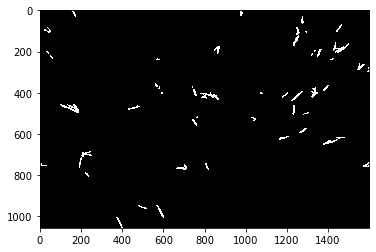

In [5]:
from matplotlib import pyplot as plt
plt.imshow(Y_train[0])

In [2]:
orig_list = glob.glob('/home/sami/Semester 4/Mohana/dataset/trainX/*.JPG')
orig_list = sorted_nicely(orig_list)

anot_list = glob.glob('/home/sami/Semester 4/Mohana/dataset/trainY/*.png')
anot_list = sorted_nicely(anot_list)

orig_train, orig_test, anot_train, anot_test = train_test_split(orig_list,anot_list,test_size = 0.1)
x_train = np.asarray(orig_train)
y_train = np.asarray(anot_train)
x_test = np.asarray(orig_test)
y_test = np.asarray(anot_test)


Y_train = np.array([tf.keras.preprocessing.image.img_to_array(image.load_img(fname),dtype="uint8") for fname in y_train])#target_size = (512,800)
Y_train = Y_train/255

one_ch =Y_train[:,:,:,0]+2*Y_train[:,:,:,2]
del Y_train
X_train = np.array([tf.keras.preprocessing.image.img_to_array(image.load_img(fname),dtype="uint8") for fname in x_train])


In [ ]:

orig_list = glob.glob('/home/sami/Semester 4/Mohana/Prep Data_train/Y_split/*.png')
orig_list = sorted_nicely(orig_list)
pathyt = '/home/sami/Semester 4/Mohana/Prep Data_train/y_one_ch/'
x_train = np.asarray(orig_list)
for i in range(x_train.shape[0]):
    Y_train = np.array([tf.keras.preprocessing.image.img_to_array(image.load_img(x_train[i]),dtype="uint8")])[0]#target_size = (512,800)
    
    Y_train = Y_train/255
    one_ch =Y_train[:,:,0]+2*Y_train[:,:,2]
    filenamey= str(i+1)+'.png'
    cv2.imwrite(os.path.join(pathyt , filenamey),one_ch)
    

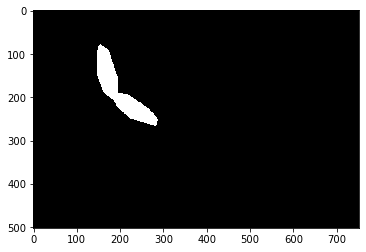

In [2]:
Y_train = np.array([tf.keras.preprocessing.image.img_to_array(image.load_img('/home/sami/Semester 4/Mohana/Prep_data_val/y_one_ch_val/52.png'),dtype="uint8")])[0]#target_size = (512,800)

plt.imshow(Y_train*255)

In [5]:
Y_train.min()

0

In [13]:
Y_train.max()

0

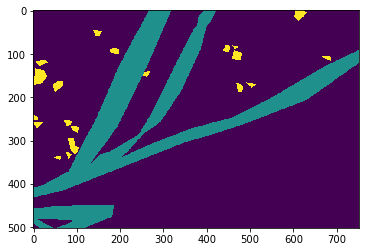

In [8]:
orig_list = glob.glob('/home/sami/Semester 4/Mohana/Prep Data_train/Y_split/*.png')
orig_list = sorted_nicely(orig_list)
pathyt = '/home/sami/Semester 4/Mohana/Prep Data_train/y_one_ch/'
x_train = np.asarray(orig_list)
i=50
Y_train = np.array([tf.keras.preprocessing.image.img_to_array(image.load_img(x_train[i]),dtype="uint8")])[0]#target_size = (512,800)
Y_train = Y_train/255
one_ch =Y_train[:,:,0]+2*Y_train[:,:,2]
filenamey= str(i+1)+'.png'
plt.imshow(one_ch)

In [10]:
one_ch[:,].max()

0.0

In [46]:
for file in x_train[0:1]:
    print(file)
    

/home/sami/Semester 4/Mohana/Prep Data/Y_split/1.png


In [31]:
Y_train = np.array([tf.keras.preprocessing.image.img_to_array(image.load_img(x_train[58]),dtype="uint8")])[0]
Y_train = Y_train/255
one_ch =Y_train[:,:,0]+2*Y_train[:,:,2]

In [33]:
pathyt = '/home/sami/Semester 4/Mohana/Prep Data/y_one_ch'
filenamey =str(1)+'.png'
cv2.imwrite(os.path.join(pathyt , filenamey),one_ch)

True

In [34]:

Y_train = np.array([tf.keras.preprocessing.image.img_to_array(image.load_img('/home/sami/Semester 4/Mohana/Prep Data/y_one_ch/1.png'),dtype="uint8")])[0]

In [42]:
Y_train[0:100,0:100].max()

1

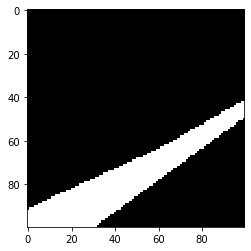

In [43]:
from matplotlib import pyplot as plt
plt.imshow(Y_train[0:100,0:100]*255)

In [10]:
x_train.shape

(17280,)

In [3]:
len(anot_list)

270

In [48]:
images = glob.glob('/home/sami/Semester 4/Mohana/dataset/valX/*.JPG')
heatmaps = glob.glob('/home/sami/Semester 4/Mohana/dataset/valY/*.png')
images1 = glob.glob('Data/thesis/train/images/*.png')
heatmaps1 = glob.glob('Data/thesis/train/heatmaps/*.png')
images =sorted_nicely(images)
heatmaps = sorted_nicely(heatmaps)
images1 =sorted_nicely(images1)
heatmaps1 = sorted_nicely(heatmaps1)
print (len(images))
print (len(heatmaps))
#heatmaps = glob.glob('Data/final/train/heatmaps/*.png')
#print (len(heatmaps))

54
54


In [49]:
k = 1
k1 = 1
for img in range(len(images)):
    k = image_split1(k,images[img],8,752,502,'/home/sami/Semester 4/Mohana/Prep_data_val/x_val_split')
    print (k)
    k1 = image_split1(k1,heatmaps[img],8,752,502,'/home/sami/Semester 4/Mohana/Prep_data_val/y_val_split')

(4016, 6016, 3)
65
(4016, 6016, 3)
(4016, 6016, 3)
129
(4016, 6016, 3)
(4016, 6016, 3)
193
(4016, 6016, 3)
(4016, 6016, 3)
257
(4016, 6016, 3)
(4016, 6016, 3)
321
(4016, 6016, 3)
(4016, 6016, 3)
385
(4016, 6016, 3)
(4016, 6016, 3)
449
(4016, 6016, 3)
(4016, 6016, 3)
513
(4016, 6016, 3)
(4016, 6016, 3)
577
(4016, 6016, 3)
(4016, 6016, 3)
641
(4016, 6016, 3)
(4016, 6016, 3)
705
(4016, 6016, 3)
(4016, 6016, 3)
769
(4016, 6016, 3)
(4016, 6016, 3)
833
(4016, 6016, 3)
(4016, 6016, 3)
897
(4016, 6016, 3)
(4016, 6016, 3)
961
(4016, 6016, 3)
(4016, 6016, 3)
1025
(4016, 6016, 3)
(4016, 6016, 3)
1089
(4016, 6016, 3)
(4016, 6016, 3)
1153
(4016, 6016, 3)
(4016, 6016, 3)
1217
(4016, 6016, 3)
(4016, 6016, 3)
1281
(4016, 6016, 3)
(4016, 6016, 3)
1345
(4016, 6016, 3)
(4016, 6016, 3)
1409
(4016, 6016, 3)
(4016, 6016, 3)
1473
(4016, 6016, 3)
(4016, 6016, 3)
1537
(4016, 6016, 3)
(4016, 6016, 3)
1601
(4016, 6016, 3)
(4016, 6016, 3)
1665
(4016, 6016, 3)
(4016, 6016, 3)
1729
(4016, 6016, 3)
(4016, 6016, 3)
1

NameError: name 'train_test_split' is not defined

In [4]:
x_train = np.asarray(orig_list)
y_train = np.asarray(anot_list)


In [5]:
x_train.shape

(270,)

In [7]:
#orig_list =[]
#for k, file in enumerate (files):
#    orig_list.append(path + files[k][38:58] + '.JPG')
#orig_train = np.asarray(orig_test)
#anot_train = np.asarray(anot_test)
#orig = orig_train[:]
#anot = anot_train[:]

In [21]:
a = image.img_to_array(image.load_img(y_train[0]))


In [24]:
a.dtype

dtype('float32')

In [6]:
from matplotlib import pyplot as plt
plt.imshow(a)

NameError: name 'a' is not defined

In [34]:

Y_train = np.array([tf.keras.preprocessing.image.img_to_array(image.load_img(fname),dtype="uint8") for fname in y_train])

In [28]:
help(image.img_to_array)

Help on function img_to_array in module keras.preprocessing.image:

img_to_array(img, data_format=None)
    Converts a PIL Image instance to a Numpy array.
    
    # Arguments
        img: PIL Image instance.
        data_format: Image data format.
    
    # Returns
        A 3D Numpy array.
    
    # Raises
        ValueError: if invalid `img` or `data_format` is passed.



In [35]:
Y_train.dtype

dtype('uint8')

In [36]:
from sys import getsizeof
getsizeof(Y_train)

144961680

In [37]:
579846288-144961680

434884608

In [45]:
from sys import getsizeof
getsizeof(X_train)

19569807504

MemoryError: Unable to allocate 146. GiB for an array with shape (270, 4016, 6016, 3) and data type float64

In [ ]:
from sys import getsizeof
print(getsizeof(one_ch))
print(getsizeof(X_train))

In [22]:
dt = np.dtype('b')

In [ ]:
yaa = (Y_train/255.0).astype('uint8')
dt = np.dtype((np.void, 4))
yaa= np.array(yaa,dtype = dt)

In [ ]:
yaa.max()

In [15]:
from sys import getsizeof
getsizeof(one_ch)

724807824

In [71]:
type(dt)

numpy.dtype

In [9]:
Y_train.shape

(10, 4016, 6016, 3)

In [55]:
yaa.dtype

dtype('uint8')

In [57]:
yaa.min()

0

In [60]:
one_ch =yaa[:,:,:,0]+2*yaa[:,:,:,2]
one_ch.max()

2

In [72]:
dt = np.dtype(np.bool)
yaa= np.array(yaa,dtype = dt)

In [66]:
from sys import getsizeof
getsizeof(Y_train)

724807824

In [67]:
from sys import getsizeof
getsizeof(one_ch)

241602688

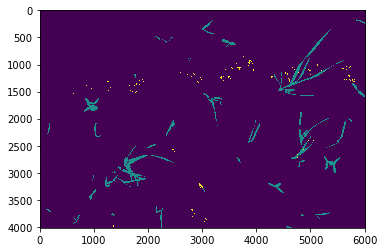

In [62]:
plt.imshow(one_ch[0,:,:])

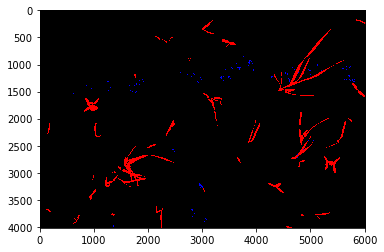

In [18]:
plt.imshow(yaa[0])

In [47]:
Y_train[:,:,:,0][Y_train[:,:,:,0]>0]=1.0
Y_train[:,:,:,1][Y_train[:,:,:,1]>0]=1.0

val = Y_train.copy()
a=np.logical_xor(Y_train[:,:,:,0],Y_train[:,:,:,1]) # gives overlap zero
b= np.subtract(a,Y_train[:,:,:,0])

val[:,:,:,0] = Y_train[:,:,:,0]

val[:,:,:,1] = b
val[:,:,:,2] = np.logical_not(a)


In [48]:
(val[:,:,:,0]+val[:,:,:,1]).max()

1.0

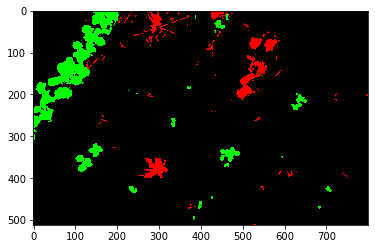

In [51]:
from matplotlib import pyplot as plt
plt.imshow(val[12,:,:,:])

In [25]:
(Y_train[:,:,:,0]+Y_train[:,:,:,1]).max()

2.0

In [52]:
for i in range(X_train.shape[0]):
    
    pathxt = '/home/sami/Downloads/Canola Dataset/labeled/Final 98/More segmentation/x_aug/split'
    pathyt = '/home/sami/Downloads/Canola Dataset/labeled/Final 98/More segmentation/y_aug/split'
    filenamex=str(i)+str('1233.png')
    filenamey=str(i)+str('1233.png')
    cv2.imwrite(os.path.join(pathxt , filenamex), cv2.cvtColor(X_train[i], cv2.COLOR_RGB2BGR))
    cv2.imwrite(os.path.join(pathyt , filenamey), cv2.cvtColor(val[i], cv2.COLOR_RGB2BGR))

In [6]:

Y_train = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in y_train])
X_train = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in x_train])
Y_test = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in y_test])
X_test = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in x_test])


In [14]:
Y_train[Y_train>0]=255.0

In [25]:
y=np.logical_and(Y_train[:,:,:,0],Y_train[:,:,:,1])

In [7]:

Y_train[:,:,:,0][Y_train[:,:,:,0]>0]=1.0
Y_train[:,:,:,1][Y_train[:,:,:,1]>0]=1.0

Y_test[:,:,:,0][Y_test[:,:,:,0]>0]=1.0
Y_test[:,:,:,1][Y_test[:,:,:,1]>0]=1.0


In [30]:
val = Y_train.copy()
val[:,:,:,0][val[:,:,:,0]>0]=1.0
val[:,:,:,1][val[:,:,:,1]>0]=1.0
y=np.logical_and(val[:,:,:,0],val[:,:,:,1])
print(y.max())

False


In [22]:
val = Y_train.copy()
a=np.logical_xor(Y_train[:,:,:,0],Y_train[:,:,:,1])
b= np.subtract(a,Y_train[:,:,:,0])

val[:,:,:,0] = np.logical_not(a)
val[:,:,:,1] = Y_train[:,:,:,0]
val[:,:,:,2] = b

In [32]:
one = val[:,:,:,0] + val[:,:,:,1]
one.max()

1.0

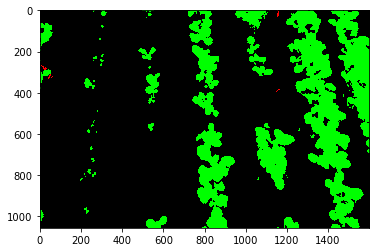

In [35]:
from matplotlib import pyplot as plt 
plt.imshow(val[0])

In [13]:
val = Y_val.copy()
a=np.logical_xor(Y_val[:,:,:,1],Y_val[:,:,:,2])
b= np.subtract(a,Y_val[:,:,:,1])

val[:,:,:,0] = np.logical_not(a)
val[:,:,:,1] = Y_val[:,:,:,1]
val[:,:,:,2] = b

False

In [23]:
Y_train[Y_train<200]=0.0
Y_test[Y_test<200]=0.0
Y_train[Y_train>200]=1.0
Y_test[Y_test>200]=1.0

In [10]:
X_test.max()

255.0

In [10]:
for i in range(Y_train.shape[0]):
    
    Y_train[i]= cv2.medianBlur(Y_train[i], 3)
    if i<Y_test.shape[0]:
        Y_test[i] = cv2.medianBlur(Y_test[i], 3)

    

In [13]:
Y_train.min()

0.0

In [36]:
Y_train.max()

255.0

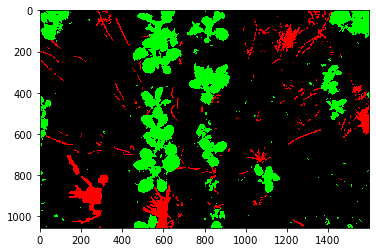

In [25]:
plt.imshow(Y_train[10])

In [ ]:
Y_train = np.array([image.img_to_array(image.load_img(fname)) for fname in y_train[0:10]])#target_size = (512,800)
X_train = np.array([image.img_to_array(image.load_img(fname)) for fname in x_train[0:10]])

In [41]:
X_train, Y_train, X_test, Y_test = augment_high_order (X_train, Y_train, X_test, Y_test,0)

Step 1 completed
Step 2 completed
Step 3 completed


In [61]:
anot_list = glob.glob('/home/sami/Semester 3/Datasets/Canola/Ytest/*.png')
anot_list = sorted_nicely(anot_list)
Y_train = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in anot_list])


In [42]:
Y_train.max()

1.0

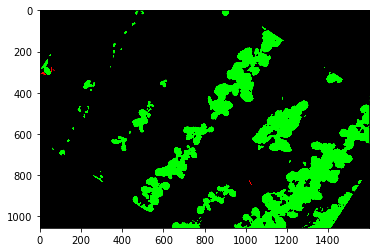

In [28]:
plt.imshow(Y_train[18])

In [29]:
Y_train[2].max()

1.0

In [31]:
Y_train[:].min()

0.0

In [58]:
Y_train[Y_train<200]=0.0
Y_test[Y_test<200]=0.0
Y_train[Y_train>200]=255.0
Y_test[Y_test>200]=255.0

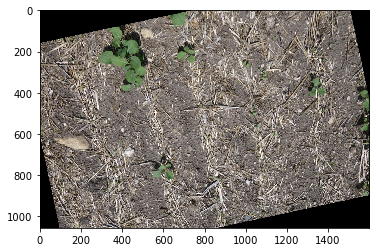

In [33]:
plt.imshow(X_train[19]/255)

In [39]:
ymap=(Y_train[:,:,:,0])+Y_train[:,:,:,1]

In [51]:
ymap=np.round(2*(Y_train[:,:,:,0]))+np.round(Y_train[:,:,:,1])
ym= np.where(ymap <= 2.0 ,ymap, 0)
#print(ym)

In [52]:
ym= np.where(ymap >= 2.0 ,ymap, 0)

In [53]:
ym[21].max()

2.0

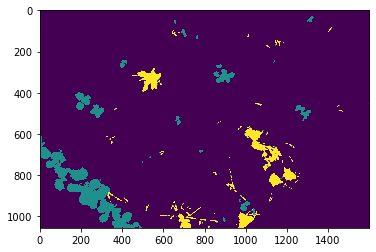

In [55]:
plt.imshow(ymap[21])

In [49]:
ymap.max()

2.0

In [51]:
for i in range(ymap.shape[0]):
    pathyt='/home/sami/Semester 3/Datasets/Canola/Yheattrain'
    filenamey=str(i)+str('.png')
    print(i)
    cv2.imwrite(os.path.join(pathyt , filenamey), ymap[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [70]:
ymap=2*(Y_train[:,:,:,0])+Y_train[:,:,:,1]
ymap = np.where(ymap <= 2.0 ,ymap, 0)
ymap.max()

2.0

In [71]:

for i in range(ymap.shape[0]):
    pathyt='/home/sami/Semester 3/Datasets/Canola/Yheattrain'
    filenamey=str(i+928)+str('.png')
    print(i)
    cv2.imwrite(os.path.join(pathyt , filenamey), ymap[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231


In [16]:
Y_train.shape

(288, 1056, 1600, 3)

In [9]:
for i in range(X_train.shape[0]):
    
    pathxt = '/home/sami/Semester 4/Mohana/Prep Data/X_aug'
    pathyt = '/home/sami/Semester 4/Mohana/Prep Data/Y_aug'
    filenamex=str(i)+str('123.jpg')
    filenamey=str(i)+str('123.png')
    cv2.imwrite(os.path.join(pathxt , filenamex), cv2.cvtColor(X_train[i], cv2.COLOR_RGB2BGR))
    cv2.imwrite(os.path.join(pathyt , filenamey), cv2.cvtColor(Y_train[i], cv2.COLOR_RGB2BGR))

In [44]:
print(i)

287


In [10]:
for i in range(X_test.shape[0]):
    
    pathxt = '/home/sami/Downloads/Canola Dataset/labeled/Final 98/More segmentation/x_test'
    pathyt = '/home/sami/Downloads/Canola Dataset/labeled/Final 98/More segmentation/y_test'
    filenamex=str(i)+str('22123.jpg')
    filenamey=str(i)+str('22123.png')
    cv2.imwrite(os.path.join(pathxt , filenamex), cv2.cvtColor(X_test[i], cv2.COLOR_RGB2BGR))
    cv2.imwrite(os.path.join(pathyt , filenamey), cv2.cvtColor(Y_test[i], cv2.COLOR_RGB2BGR))

In [62]:
print(i)

927


In [73]:
for i in range(X_test.shape[0]):
    
    pathxt = '/home/sami/Semester 3/Datasets/Canola/Xtest'
    pathyt = '/home/sami/Semester 3/Datasets/Canola/Ytest'
    filenamex=str(i+176)+str('.jpg')
    filenamey=str(i+176)+str('.png')
    print(i)
    cv2.imwrite(os.path.join(pathxt , filenamex), X_test[i])
    cv2.imwrite(os.path.join(pathyt , filenamey), Y_test[i]*255)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [11]:
for i in range(X_test.shape[0]):
    
    pathxt = '/home/sami/Semester 3/Datasets/Canola/Xtest'
    pathyt = '/home/sami/Semester 3/Datasets/Canola/Ytest'
    filename=str(i+176)+str('.jpg')
    cv2.imwrite(os.path.join(pathxt , filename), X_test[i])
    cv2.imwrite(os.path.join(pathyt , filename), Y_test[i]*255)

In [17]:
for i in range(X_test_b.shape[0]):
    
    pathxt = '/home/sami/Semester 3/Datasets/Canola/Xtest'
    pathyt = '/home/sami/Semester 3/Datasets/Canola/Ytest'
    filenamex=str(i+220)+str('.jpg')
    filenamey=str(i+220)+str('.png')
    cv2.imwrite(os.path.join(pathxt , filenamex), X_test_b[i])
    cv2.imwrite(os.path.join(pathyt , filenamey), Y_test_b[i]*255)

In [ ]:
filename=str(2)+str('.jpg')
print(filename)

In [8]:
X_train, Y_train, X_test, Y_test = augment_high_order (X_train, Y_train, X_test, Y_test,1)

Step 4 completed
Step 5 completed
Step 6 completed
All Done !!


In [67]:
Y_train.shape

(232, 1056, 1600, 3)

In [ ]:
plt.imshow(Y_train[11].max())

In [ ]:
plt.imshow(X_train[11]/255)

In [ ]:
Y_train[10,400:600,1527:,2].max()

In [ ]:
X_train = np.concatenate((X_train,X_test,X_train_b,X_test_b), axis = 0)
Y_train = np.concatenate((Y_train,Y_test,Y_train_b,Y_test_b), axis = 0)


In [ ]:
del X_test,Y_test,X_train,Y_train,X_train_b,Y_train_b

In [ ]:
plt.imshow(X_train[270]/255)

In [ ]:
plt.imshow(Y_train[270])

In [ ]:
plt.imshow(Y_train[177])

In [ ]:
print (X_train.shape)
print (Y_train.shape)
#print (X_test.shape)
#print (Y_test.shape)

In [ ]:
write_nicely(X_train,1,'Data/canola/aug_test/images')
write_nicely(Y_train,1,'Data/canola/aug_test/heatmaps')   
#write_nicely(X_test,1,'Data/aug_test/images')
#write_nicely(Y_test,1,'Data/aug_test/heatmaps') 

In [ ]:
for k in range (X_test.shape[0]):
    cv2.imwrite('Data/aug_test/' + k + '.png',X_test[k])
    cv2.imwrite('Data/aug_test/' + k + '.png',Y_test[k])

In [ ]:
plt.imshow(images_aug[12])
cv2.imwrite('aug.png',images_aug[12])

In [ ]:
plt.imshow(heatmaps_aug[12])

In [ ]:
for k in range (len(files)):
    
    cv2.imwrite('Data/temp2/fredericks_204_205/30_05_2019/' + files[k][38:58] +'.png',anot[k]/255)
    cv2.imwrite('Data/temp1/fredericks_204_205/30_05_2019/' + files[k][38:58] +'.png',orig[k])
    

In [ ]:
!nvidia-smi

In [ ]:
model = keras_segmentation.models.unet.vgg_unet(n_classes=2 ,  input_height=1056, input_width=1600  )

model.train( 
    train_images =  "Data/train/",
    train_annotations = "Data/anot/",
  
    checkpoints_path = "ckpt/" , epochs= 10
)

 #val_images="Data/test set/test/",
   # val_annotations="Data/test set/anot/",


In [ ]:
files = glob.glob('Data/test set/*.JPG')
orig = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in files])

#orig1 = orig.reshape(1056,1600,3)
plt.imshow(orig[0]/255.)

In [ ]:
files = glob.glob('Data/test set/test/*.png')
files1 = glob.glob('Data/test set/anot/*.png')
orig = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in files])
anot = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in files1])
#orig1 = orig.reshape(1056,1600,3)
plt.imshow(orig[0]/255.)

In [ ]:
anot.shape

In [ ]:
cv2.imwrite('Data/test set/PICT_20190530_142214.png',orig[1])

In [ ]:
out = model.predict_segmentation(
    inp="Data/test set/PICT_20190530_142214.png",
    out_fname="Data/test set/test2.png"
)


import matplotlib.pyplot as plt
plt.imshow(out*255)

# cv2.imwrite('Data/test set/2223.png',out*255)

In [ ]:
path = 'Data/Masks/fredericks_204_205/30_05_2019'
path1 = 'Data/Back_rm/Fred_204_205/30-05-2019'
path2 = 'Data/temp/fredericks_204_205/30_05_2019'

In [ ]:
csv_file = pd.read_csv('Data/Originals/Fred_204_205/30-05-2019/Fredericks 204-205 South.csv')

In [ ]:
files = glob.glob('Data/Back_rm/Fred_204_205/30-05-2019/*.JPG')
data = crop_pixel_counter (files, csv_file, 20, 3)
files = glob.glob('Data/temp/fredericks_204_205/30_05_2019/*.png')
files = sorted_nicely(files)


for k, file in enumerate (files):
    image = cv2.imread (file)
    image[image != 0] = 1
    weed_percent =count_nonblack_np(image)/PIXEL*100
    print (weed_percent)
    data['Weed Leaves Area'][files[k][40:60] + '.JPG'] = weed_percent
    data['Crop Leaves Area'][files[k][40:60] + '.JPG'] = data['Crop Leaves Area'][files[k][40:60] + '.JPG'] - weed_percent

    
data.to_csv('Data/CSV/fredericks_204_205/30_05_2019/Fredericks 204-205 South.csv')    
data





        
    

In [ ]:
data.loc['PICT_20190530_150019.JPG']

In [ ]:
image = cv2.imread ('Data/Back_rm/Fred_204_205/30-05-2019/PICT_20190530_142058.JPG')

In [ ]:
image1 = cv2.imread ('Data/temp/fredericks_204_205/30_05_2019/PICT_20190530_142058.png')

In [ ]:
image = cv2.imread ('Data/Back_rm/Fred_204_205/30-05-2019/PICT_20190530_152239.JPG')
image = thresholding(image,20)
image = median_filter(image,5)
image[image!=0] = 1
image.sum()

In [ ]:
cv2.imwrite('result2.png',255*image)

In [ ]:
my_image.sum()/PIXEL*100

In [ ]:
from PIL import Image

img = Image.open('Data/temp/fredericks_204_205/30_05_2019/PICT_20190530_142110.png')

In [ ]:
arr = (np.asarray(img))
s = arr.sum(-1)

In [ ]:
s[s!=0]=1
s.sum()/PIXEL*100

In [ ]:
files = glob.glob('Data/temp/fredericks_204_205/30_05_2019/*.png')


In [ ]:
files = glob.glob('Data/temp/fredericks_204_205/30_05_2019/*.png')
files = sorted_nicely(files)
for k, file in enumerate (files):
    index = 
    image = cv2.imread (file)
    image[image != 0] = 1
    crop_percent = image.sum()/PIXEL*100
    data['Crop %age'][files[0][40:60] + '.JPG'] = crop_percent/3

In [ ]:
def weed_pixel_counter (files, data):
    files = sorted_nicely(files)
    data = data.set_index('filename')
    data['Crop %age'] = 0
    data['Weed %age'] = 0
    for k, file in enumerate (files):
        image = cv2.imread (file)
        image[image != 0] = 1
        crop_percent = image.sum()/PIXEL*100
        data['Crop %age'][k] = crop_percent
    return data